In [7]:
"""
Python script to scrape Friktion User Data from Bitquery GraphQL API.

"""

import json
import requests
import requests
import traceback
import time

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from os.path import exists

# 

# GET Prices

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import json
import ccxt

import datetime

cftx = ccxt.ftx(
    {
        "apiKey":"mvnd3WRG56rAP-6MpxFyZ5sN2WnjEO8UsQB6u-6s",
        "secret":"m_m926E36IMlrhCv6bGkLdSdaVegbm5PggpCrFCM"
    }
)

markets = cftx.load_markets()
binance = ccxt.binance()

# 10 days
time_since = datetime.datetime.timestamp(datetime.datetime.now())*1000-10*24*60*60*1000

symbols = {
    "BTC": "BTC/USD", 
    "ETH": "ETH/USD", 
    "SOL": "SOL/USD", 
    "MSOL": "MSOL/USD", 
    "LUNA": "LUNA/USD:USD", 
    "FTT": "FTT/USD", 
    "SRM": "SRM/USD",
    "MNGO": "MNGO/USD",
    "RAY": "RAY/USD", 
    "STEP": "STEP/USD",
    "AVAX": "AVAX/USD"
}
pricedf = {}
for k, symbol in symbols.items():
    data = cftx.fetchOHLCV(symbol, '1m', since=time_since, limit=1)
    tree = pd.DataFrame(data, columns=["time", "open", "high", "low", "close", "volume"])
    data
    print(data)
    pricedf[k] = tree["close"]
    

# Random price hardcodes b/c they aren't traded on FTX

pricedf["USDC"] =pricedf["tsUSDC"] = pricedf["UST"] = 1
pricedf["mSOL"] = pricedf["SOL"]*1.03
pricedf["scnSOL"] = pricedf["SOL"]*1.03
pricedf["SBR"] = 0.04000

[[1647933120000, 42289.0, 42295.0, 42264.0, 42287.0, 80712.181]]
[[1647933120000, 2989.0, 2989.6, 2987.8, 2988.5, 143609.9457]]
[[1647933120000, 90.38, 90.3875, 90.355, 90.37, 9475.065925]]
[[1647933120000, 93.675, 93.675, 93.675, 93.675, 0.0]]
[[1647933120000, 94.073, 94.089, 94.003, 94.055, 17574.3326]]
[[1647933120000, 45.665, 45.67, 45.652, 45.664, 19728.7061]]
[[1647933120000, 2.451, 2.451, 2.451, 2.451, 12.255]]
[[1647933120000, 0.1524, 0.1524, 0.1524, 0.1524, 0.0]]
[[1647933120000, 2.7664, 2.767, 2.7662, 2.7662, 5.5326]]
[[1647933120000, 0.1705, 0.1705, 0.1705, 0.1705, 0.0]]
[[1647933120000, 88.6655, 88.7025, 88.6315, 88.672, 5204.51915]]


In [186]:
tree = pd.DataFrame(pricedf).T.reset_index()

In [187]:
tree.columns = ["symbol", "price"]


In [268]:
deposits = pd.read_csv("friktion_deposit.csv")
withdrawals = pd.read_csv("friktion_withdraw.csv")
claim = pd.read_csv("friktion_claim_withdrawal.csv")
withdrawals_cxl = pd.read_csv("friktion_withdraw_cancel.csv")
deposits_cxl = pd.read_csv("friktion_deposit_cxl.csv")

In [296]:
df_all = pd.concat([withdrawals, claim, withdrawals_cxl, deposits_cxl, deposits], ignore_index=False).reset_index(drop=True)

In [297]:
df_all

,txSignature,amount,instructionAction,instructionOrder,userAddress,timestamp,currencyName,currencyAddress,senderAddress,senderTokenMint,receiverAddress,globalId,vaultAuthority,shareTokenMint,depositTokenSymbol,depositTokenCoingeckoId,userAction
0,122tbxak1CeaRQSMZD2izGb9tXa7rSaRpyD2s3iSv4bKp3uyxg1uf3oDUGMYrzoNp35GMw8PhYcJbMBgVeV8bik1,1.062448,burn,1-1,GbYTQgbXndUJoczx23Hy3hobAReguEuddijnsRTkn8pJ,2022-01-09T10:12:13Z,NaN,6UA3yn28XecAHLTwoCtjfzy3WcyQj1x13bxnH8urUiKt,GbYTQgbXndUJoczx23Hy3hobAReguEuddijnsRTkn8pJ,2ALneL69HRuthso7f4inq75g8AYBTbKHKgFB2oBgE6mh,NaN,mainnet_income_call_marinade,6asST5hurmxJ8uFvh7ZRWkrMfSEzjEAJ4DNR1is3G6eH,6UA3yn28XecAHLTwoCtjfzy3WcyQj1x13bxnH8urUiKt,mSOL,msol,Withdraw
1,122urr2mqKPc1rE9EqpqZnFXWPasm27yAcLmsQP7XM7iKL5JgmYmtxJDyhDRN8qiM8C2hsZWoumggqP4xYPj3zcg,48.722463,burn,1-0,A3PS3sjJmNbMt1XZXVB7s5WVPnjPfUVykxmV6kVHqCQ4,2022-03-13T12:34:28Z,NaN,DPMCwE9z9jXaDVDti5aKhdgCWGgsvioz6ZvB9eZjH7UE,A3PS3sjJmNbMt1XZXVB7s5WVPnjPfUVykxmV6kVHqCQ4,GM3NcpB3Gwb8CBVvGNy3Nz2bHCgmDojKdWFMBBLQVCiL,NaN,mainnet_income_call_sbr,BH7Jg3f97FyeGxsPR7FFskvfqGiaLeUnJ9Ksda53Jj8h,DPMCwE9z9jXaDVDti5aKhdgCWGgsvioz6ZvB9eZjH7UE,SBR,saber,Withdraw
2,123Av6p8VGMApaN16jk3dUUYEze1RLPohUUg1h51XjNt8PYqQRA7EjACQKHTeCidXYGvNuX6TEssd66pk8wcr3XS,0.480814,burn,1-1,5e8tCdqSvhNhFWpDsy2at7LwnZwbh2RHRVvrcsUgeymi,2022-02-03T11:14:07Z,NaN,5VmdHqvRMbXivuC34w4Hux9zb1y9moiBEQmXDrTR1kV,5e8tCdqSvhNhFWpDsy2at7LwnZwbh2RHRVvrcsUgeymi,8o6bKeAW6eRQT3SGh8QMkeAvjCXgtQWLrBHJXkgf5r4G,NaN,mainnet_income_call_socean,A5MpyajTy6hdsg3S2em5ukcgY1ZBhxTxEKv8BgHajv1A,5VmdHqvRMbXivuC34w4Hux9zb1y9moiBEQmXDrTR1kV,scnSOL,socean-staked-sol,Withdraw
3,124pSR5mQXtZAQ3vES5QTqkZzyBiyYphVhc3CHkswcibTmvGxNiyhn2cjTACLpCd4uPCPqBCDcrj2JsmA2STwF3m,380.320000,burn,0-1,75JCoqqnK9aHwhGSTrYacwDDPxaySZBHVwxQ9WAdmRic,2022-01-01T07:47:41Z,NaN,DPMCwE9z9jXaDVDti5aKhdgCWGgsvioz6ZvB9eZjH7UE,75JCoqqnK9aHwhGSTrYacwDDPxaySZBHVwxQ9WAdmRic,DMxk7cTKY94j9ks84nBFb1d5H5RisWqcKheuVPzY1mHX,NaN,mainnet_income_call_sbr,BH7Jg3f97FyeGxsPR7FFskvfqGiaLeUnJ9Ksda53Jj8h,DPMCwE9z9jXaDVDti5aKhdgCWGgsvioz6ZvB9eZjH7UE,SBR,saber,Withdraw
4,1271nQpntCG8PBGdDaqkdnFaUTogSCNRpR7LfZroJebaFcub3TgArZw1EdHTezkxf6vswxwXvR1XLMrrVkeoezR5,0.097854,burn,3-1,4gsxjXky9Wrf6QwMFqCBjwaxzHfHLKgSv4ruCi1KKTi9,2021-12-24T06:32:57Z,NaN,4Hnh1UCC6HLzx9NaGKnTVHR2bANcRrhydumdHCnrT3i2,4gsxjXky9Wrf6QwMFqCBjwaxzHfHLKgSv4ruCi1KKTi9,4iHN5DsCNRufQQo1npz4JQvJubG7vJxjLng9iJ4y4SvU,NaN,mainnet_income_call_sol,Hxtb6APfNtf9m8jJjh7uYp8fCTGr9aeHxBSfiPqCrV6G,4Hnh1UCC6HLzx9NaGKnTVHR2bANcRrhydumdHCnrT3i2,SOL,solana,Withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45018,zyVxz1kQCA6TK1wuATc1GzHERF4HQYT7Sze6vj3H9dCipwpzQc7DQiDYq9aHKGi9PnJTovAaPoWFJivLhY5fUrQ,4.000000,transfer,0-0,HfW97Lwm186yH9WWaq1RF322nVyn8vVmhSgy92bjBZkt,2022-01-06T21:32:23Z,LUNA (Wormhole),F6v4wfAdJB8D8p77bMXZgYt8TDKsYxLYxH5AFhUkYx9W,HfW97Lwm186yH9WWaq1RF322nVyn8vVmhSgy92bjBZkt,8WcFxQjd3CAktJPBkQG7obuygqkXLB4Gt9fiBpsRkN5U,5oV1Yf8q1oQgPYuHjepjmKFuaG2Wng9dzTqbSWhU5W2X,mainnet_income_call_luna,5oV1Yf8q1oQgPYuHjepjmKFuaG2Wng9dzTqbSWhU5W2X,95sn4kgeJnnBfRCD8S2quu4HS9Y6vb7JDuXrarnmEjYE,LUNA,terra-luna,Deposit
45019,zyWwiyhoPt37qBqNGGhVToWQugoJ2jMzmp5FBrjRFzuyfV6e7p1QJzWSBoyDaZB6vRgzbXFbABebnR8wi1r86T9,0.011698,transfer,1-1,8arRjN8Kg8tZhhkQsoXg5y29DBHKEsxknGuUBqSHUC6i,2022-02-24T01:03:57Z,Wrapped Bitcoin (Sollet),9n4nbM75f5Ui33ZbPYXn59EwSgE8CGsHtAeTH5YFeJ9E,8arRjN8Kg8tZhhkQsoXg5y29DBHKEsxknGuUBqSHUC6i,56mMYR7erJUUYVxuZraHhnq4AKBf6GZRC3gNwoUtAvQi,DA1M8mw7GnPNKU9ReANtHPQyuVzKZtsuuSbCyc2uX2du,mainnet_income_call_btc,DA1M8mw7GnPNKU9ReANtHPQyuVzKZtsuuSbCyc2uX2du,3BjcHXvyzMsjmeqE2qFLx45K4XFx3JPiyRnjJiF5MAHt,BTC,bitcoin,Deposit
45020,zz28t8bhMn9FHGsb2uhicqjiCVRq1wKeHccVg3yta1zGVpQpgfJW63X7DujKcVkyUxDzXsRNnpvekNDDj5qTihi,1000.000000,transfer,1-1,DNpaVTkiQMiHgGXNMRzFpeVS9GwzZjQPGUxmZ2pEMakt,2022-02-16T18:47:10Z,USD Coin,EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v,DNpaVTkiQMiHgGXNMRzFpeVS9GwzZjQPGUxmZ2pEMakt,5W2FqmiNCdSMeHZp2wacxmbCeRxHGFgHuFuY9QM2hh8z,CVrRw6VtxSjokm2tKmaS5RCuoc9EFjN4wEoo

In [298]:
df_all = pd.merge(df_all, tree, left_on="depositTokenSymbol", right_on="symbol", how='left')


In [299]:
# df_all["timestamp"] = pd.to_datetime(df_all.timestamp)

In [300]:
df_all["amount_usdc"] = df_all["amount"]*df_all["price"]

In [301]:
unique_users = df_all.groupby('timestamp').userAddress.nunique().reset_index()#.plot()#.cumsum()


In [302]:
# unique_users["date"] = unique_users.timestamp.dt.date

<AxesSubplot:xlabel='timestamp'>

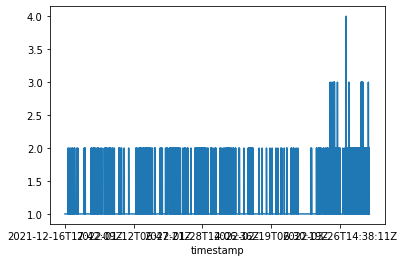

In [303]:
unique_users.groupby("timestamp").userAddress.sum().plot()

Text(0.5, 1.0, 'Friktion Volt Unique Users')

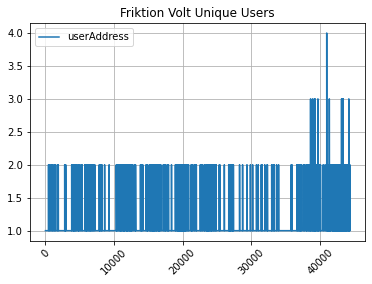

In [304]:
unique_users.plot(grid=True)
plt.xticks(rotation=45)
plt.title("Friktion Volt Unique Users")

In [305]:
df_all.userAction.unique()

array(['Withdraw', 'ClaimPendingWithdrawal', 'CancelPendingWithdrawal',
       'CancelPendingDeposit', 'Deposit'], dtype=object)

In [306]:
df_all.columns

Index(['txSignature', 'amount', 'instructionAction', 'instructionOrder',
       'userAddress', 'timestamp', 'currencyName', 'currencyAddress',
       'senderAddress', 'senderTokenMint', 'receiverAddress', 'globalId',
       'vaultAuthority', 'shareTokenMint', 'depositTokenSymbol',
       'depositTokenCoingeckoId', 'userAction', 'symbol', 'price',
       'amount_usdc'],
      dtype='object')

In [307]:
def calculate_tvl_change(x):
    mult = 0
    if x["userAction"] in ["Deposit", "CancelPendingWithdrawal"]:
        mult = 1
    elif x["userAction"] in ["CancelPendingDeposit", "Deposit"]:
        mult = -1
    
    return x["amount_usdc"]*mult

In [308]:
# df_all["tvl_change"] = 
df_all.apply(lambda x: calculate_tvl_change(x), axis=1)

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
            ...     
45018     376.220000
45019     494.673326
45020    1000.000000
45021    3030.757390
45022     400.000000
Length: 45023, dtype: float64

In [309]:
df_all["tvl_change"] = df_all.apply(lambda x: calculate_tvl_change(x), axis=1)
tvl = df_all.groupby('timestamp')["tvl_change"].sum().cumsum()

In [310]:
tvl

timestamp
2021-12-16T17:42:09Z    8.448943e+01
2021-12-16T17:44:06Z    8.448943e+01
2021-12-16T17:47:02Z    1.689789e+02
2021-12-16T20:01:02Z    3.804139e+02
2021-12-16T20:13:51Z    5.918489e+02
                            ...     
2022-03-31T23:04:38Z    2.023850e+08
2022-03-31T23:05:22Z    2.023852e+08
2022-03-31T23:08:33Z    2.024078e+08
2022-03-31T23:12:19Z    2.024077e+08
2022-03-31T23:16:28Z    2.024078e+08
Name: tvl_change, Length: 44339, dtype: float64

In [311]:
tvl = df_all.loc[df_all.userAction!="ClaimPendingWithdrawal"].groupby("timestamp").amount_usdc.sum().cumsum()

In [312]:
tvl = tvl.reset_index()

In [313]:
unique_users

,timestamp,userAddress
0,2021-12-16T17:42:09Z,1
1,2021-12-16T17:44:06Z,1
2,2021-12-16T17:47:02Z,1
3,2021-12-16T20:01:02Z,1
4,2021-12-16T20:13:51Z,1
...,...,...
44334,2022-03-31T23:04:38Z,1
44335,2022-03-31T23:05:22Z,1
44336,2022-03-31T23:08:33Z,1
44337,2022-03-31T23:12:19Z,1


In [325]:
def cum_unique(x):
    return df_all.loc[df_all.timestamp < x.timestamp].userAddress.nunique()

In [326]:
df_all.apply(lambda x: cum_unique(x), axis=1)

0         4085
1        10147
2         8307
3         2802
4         1273
         ...  
45018     3843
45019     9603
45020     9291
45021     3864
45022     3815
Length: 45023, dtype: int64

In [314]:
unique_users = df_all.groupby('timestamp').userAddress.nunique().cumsum().reset_index()

In [321]:
df_all.userAddress.unique().shape

(13705,)

In [ ]:
# 

Average TVL per user over time

Distribution of Total deposits per unique user

Distribution of Total withdrawals per unique user

Distribution of Current TVL per user



In [315]:
unique_users

,timestamp,userAddress
0,2021-12-16T17:42:09Z,1
1,2021-12-16T17:44:06Z,2
2,2021-12-16T17:47:02Z,3
3,2021-12-16T20:01:02Z,4
4,2021-12-16T20:13:51Z,5
...,...,...
44334,2022-03-31T23:04:38Z,44805
44335,2022-03-31T23:05:22Z,44806
44336,2022-03-31T23:08:33Z,44807
44337,2022-03-31T23:12:19Z,44808


In [316]:
zz = pd.merge(unique_users, tvl, on="timestamp")

In [317]:
zz["tvl_per_user"] = zz["amount_usdc"]/zz["userAddress"]

<AxesSubplot:xlabel='timestamp'>

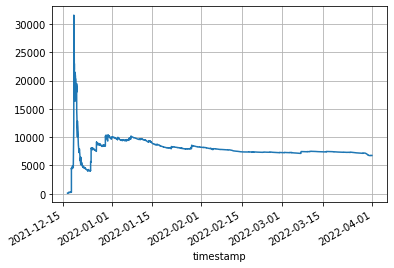

In [318]:
zz["timestamp"] = pd.to_datetime(zz.timestamp)
zz.set_index("timestamp")["tvl_per_user"].plot(grid=True)


In [319]:
df_all.loc[df_all.userAction=="Deposit"].groupby("timestamp")["amount_usdc"].sum()

timestamp
2021-12-16T17:42:09Z       84.489426
2021-12-16T17:47:02Z       84.489426
2021-12-16T20:01:02Z      211.435000
2021-12-16T20:13:51Z      211.435000
2021-12-16T20:23:30Z       42.287000
                            ...     
2022-03-31T23:03:31Z        9.037000
2022-03-31T23:04:38Z      283.060177
2022-03-31T23:05:22Z      180.740000
2022-03-31T23:08:33Z    22587.205799
2022-03-31T23:16:28Z       89.565952
Name: amount_usdc, Length: 29175, dtype: float64

In [295]:
df_all.userAction.unique()

array(['Withdraw', 'ClaimPendingWithdrawal', 'CancelPendingWithdrawal',
       'CancelPendingDeposit'], dtype=object)